# import library

In [ ]:
!pip install imbalanced-learn
!pip install xgboost


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Read data

In [ ]:
df = pd.read_csv('diabetes.csv')

In [ ]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [ ]:
df.tail()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0

In [ ]:
df.shape

(768, 9)

In [ ]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

# Cleaning data

In [ ]:
# Check for missing values
print(df.isnull().sum())

# Check for duplicates
print(f"Number of duplicates: {df.duplicated().sum()}")

# Remove duplicates (if any)
df.drop_duplicates(inplace=True)




Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
Number of duplicates: 0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Explore data analysis

## basic statistic

In [ ]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

## distribution

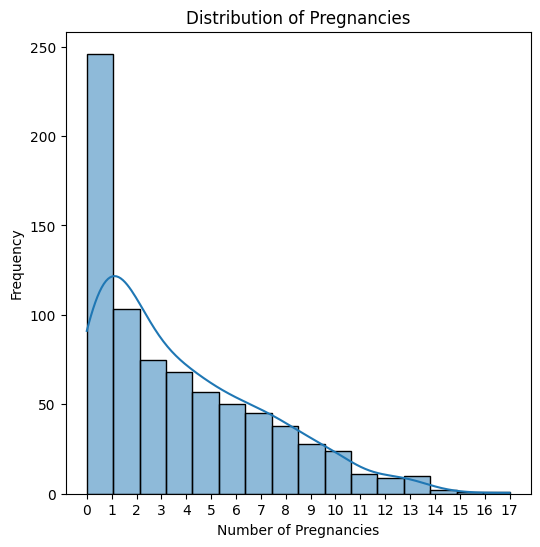

In [ ]:
plt.figure(figsize=(6, 6))
sns.histplot(df['Pregnancies'], kde=True)  # kde=True adds a kernel density estimate
plt.title('Distribution of Pregnancies')
plt.xlabel('Number of Pregnancies')
plt.ylabel('Frequency')
min_x, max_x = plt.xlim()
plt.xticks(np.arange(int(min_x), int(max_x) + 1, 1))

plt.show()

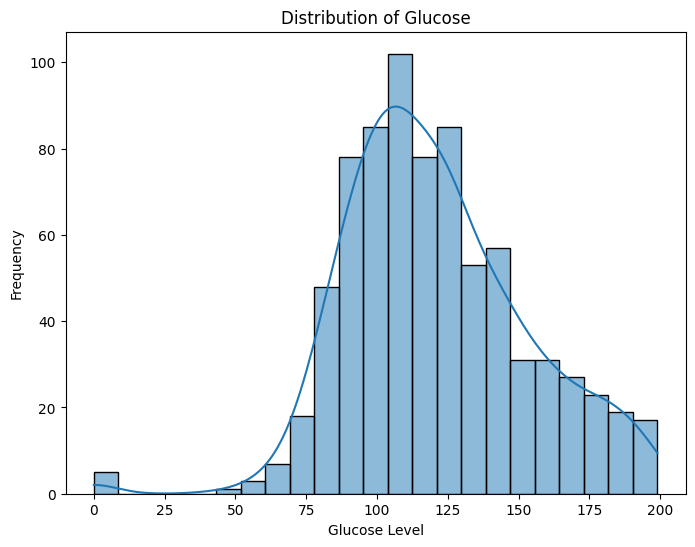

In [ ]:

# Plot histogram for 'Glucose'
plt.figure(figsize=(8, 6))
sns.histplot(df['Glucose'], kde=True)  # kde=True adds a kernel density estimate
plt.title('Distribution of Glucose')
plt.xlabel('Glucose Level')
plt.ylabel('Frequency')
plt.show()


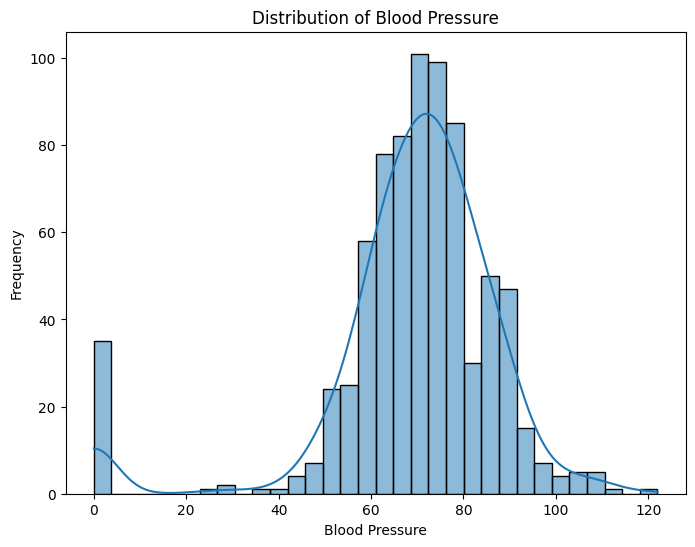

In [ ]:
# Plot histogram for 'BloodPressure'
plt.figure(figsize=(8, 6))
sns.histplot(df['BloodPressure'], kde=True)  # kde=True adds a kernel density estimate
plt.title('Distribution of Blood Pressure')
plt.xlabel('Blood Pressure')
plt.ylabel('Frequency')
plt.show()


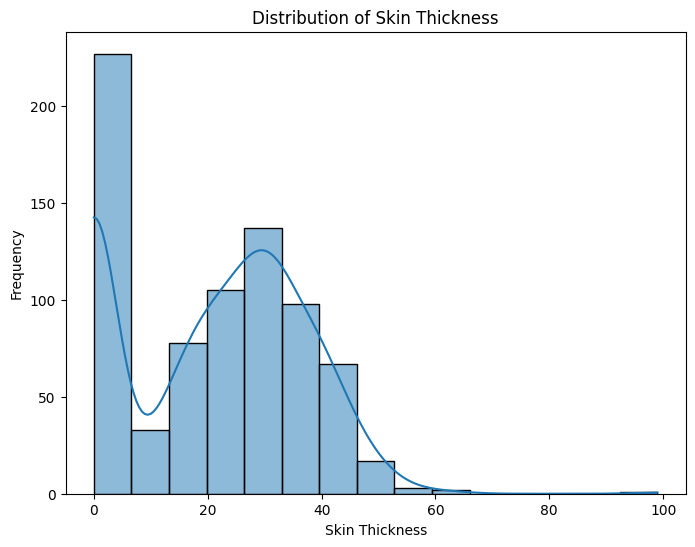

In [ ]:
# Plot histogram for 'SkinThickness'
plt.figure(figsize=(8, 6))
sns.histplot(df['SkinThickness'], kde=True)  # kde=True adds a kernel density estimate
plt.title('Distribution of Skin Thickness')
plt.xlabel('Skin Thickness')
plt.ylabel('Frequency')
plt.show()


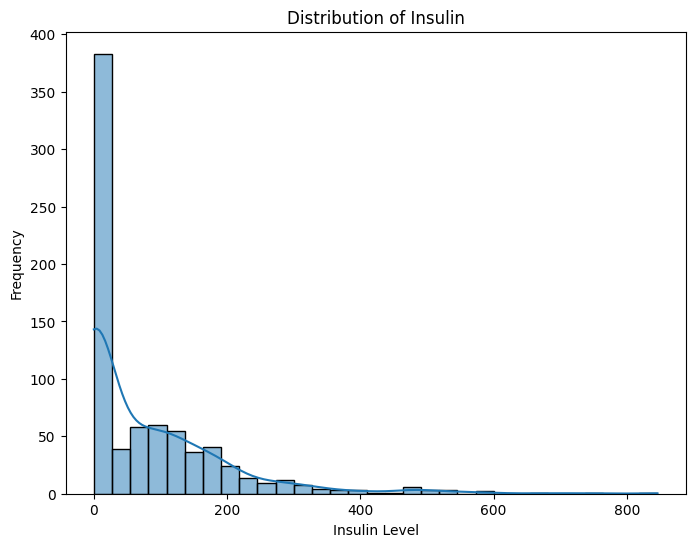

In [ ]:
# Plot histogram for 'Insulin'
plt.figure(figsize=(8, 6))
sns.histplot(df['Insulin'], kde=True)  # kde=True adds a kernel density estimate
plt.title('Distribution of Insulin')
plt.xlabel('Insulin Level')
plt.ylabel('Frequency')
plt.show()


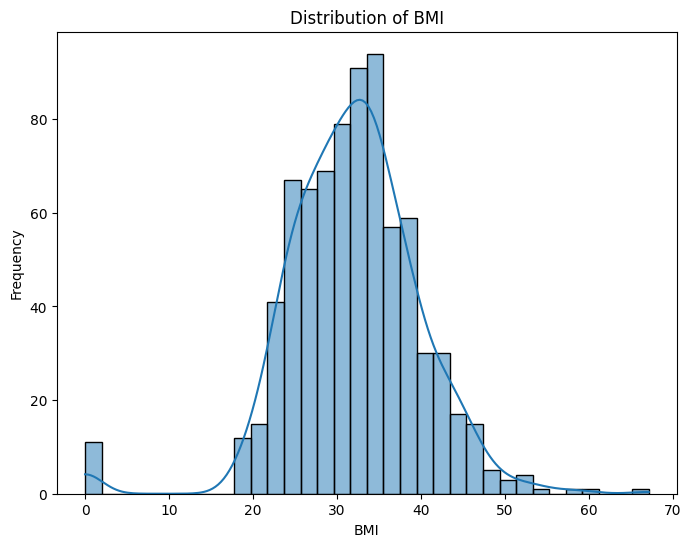

In [ ]:
# Plot histogram for 'BMI'
plt.figure(figsize=(8, 6))
sns.histplot(df['BMI'], kde=True)  # kde=True adds a kernel density estimate
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()


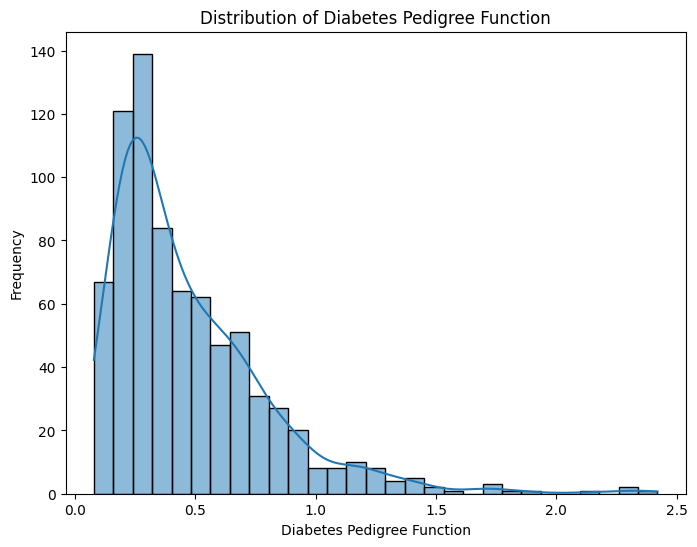

In [ ]:
# Plot histogram for 'DiabetesPedigreeFunction'
plt.figure(figsize=(8, 6))
sns.histplot(df['DiabetesPedigreeFunction'], kde=True)  # kde=True adds a kernel density estimate
plt.title('Distribution of Diabetes Pedigree Function')
plt.xlabel('Diabetes Pedigree Function')
plt.ylabel('Frequency')
plt.show()


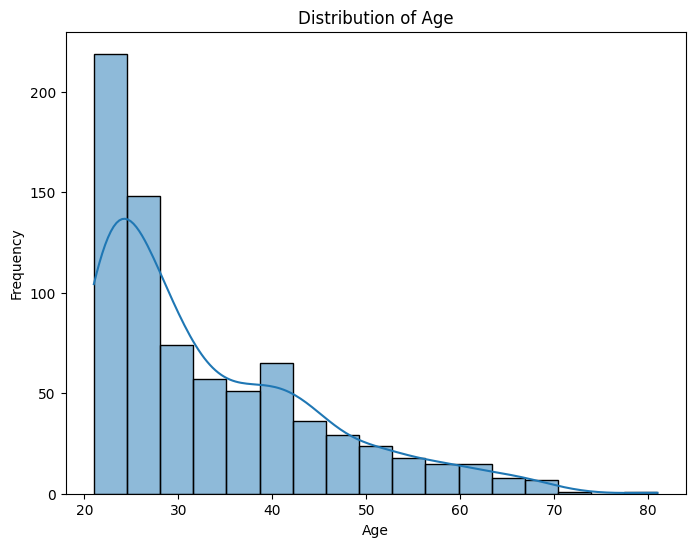

In [ ]:
# Plot histogram for 'Age'
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], kde=True)  # kde=True adds a kernel density estimate
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


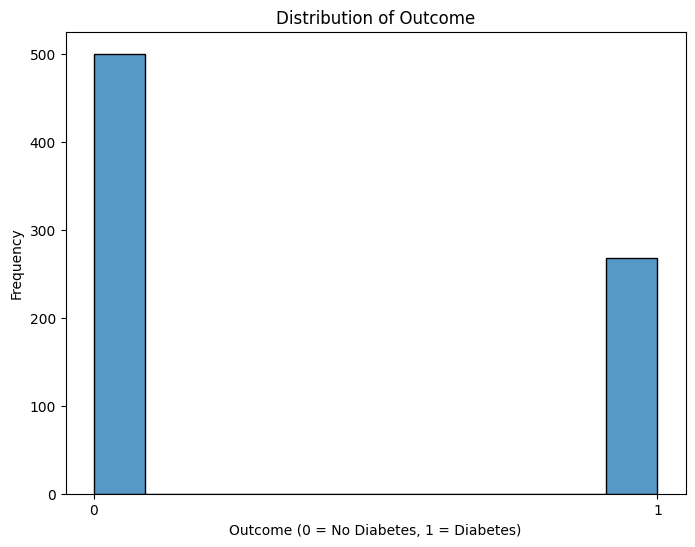

In [ ]:
# prompt: histogram of outcome

# Plot histogram for 'Outcome'
plt.figure(figsize=(8, 6))
sns.histplot(df['Outcome'], kde=False)  # kde=False for a pure histogram, no density curve
plt.title('Distribution of Outcome')
plt.xlabel('Outcome (0 = No Diabetes, 1 = Diabetes)')
plt.ylabel('Frequency')
plt.xticks([0, 1]) # Ensure only 0 and 1 are shown on the x-axis
plt.show()


## mean



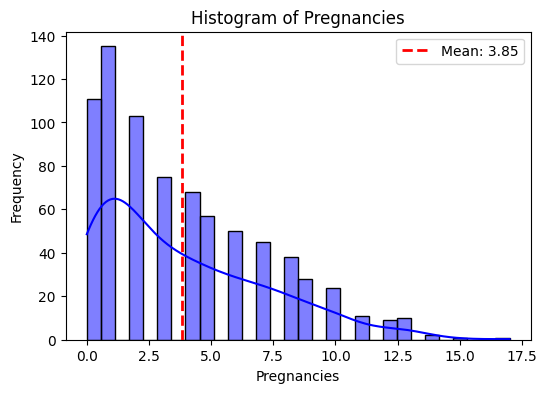

In [ ]:
plt.figure(figsize=(6, 4))
sns.histplot(df["Pregnancies"], bins=30, kde=True, color='blue')
plt.axvline(df["Pregnancies"].mean(), color='red', linestyle='dashed', linewidth=2, label=f"Mean: {df['Pregnancies'].mean():.2f}")
plt.title("Histogram of Pregnancies")
plt.xlabel("Pregnancies")
plt.ylabel("Frequency")
plt.legend()
plt.show()


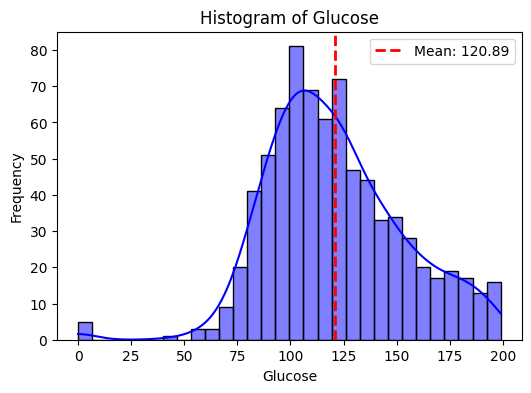

In [ ]:
plt.figure(figsize=(6, 4))
sns.histplot(df["Glucose"], bins=30, kde=True, color='blue')
plt.axvline(df["Glucose"].mean(), color='red', linestyle='dashed', linewidth=2, label=f"Mean: {df['Glucose'].mean():.2f}")
plt.title("Histogram of Glucose")
plt.xlabel("Glucose")
plt.ylabel("Frequency")
plt.legend()
plt.show()


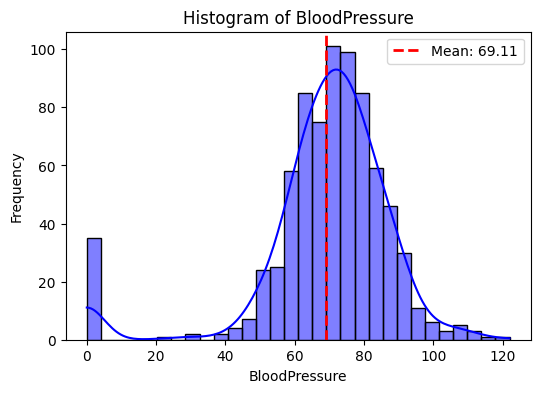

In [ ]:
plt.figure(figsize=(6, 4))
sns.histplot(df["BloodPressure"], bins=30, kde=True, color='blue')
plt.axvline(df["BloodPressure"].mean(), color='red', linestyle='dashed', linewidth=2, label=f"Mean: {df['BloodPressure'].mean():.2f}")
plt.title("Histogram of BloodPressure")
plt.xlabel("BloodPressure")
plt.ylabel("Frequency")
plt.legend()
plt.show()


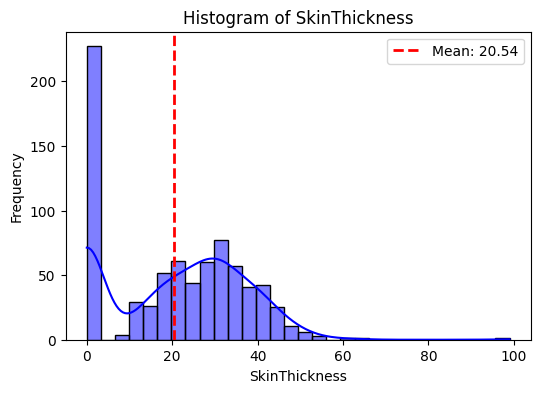

In [ ]:
plt.figure(figsize=(6, 4))
sns.histplot(df["SkinThickness"], bins=30, kde=True, color='blue')
plt.axvline(df["SkinThickness"].mean(), color='red', linestyle='dashed', linewidth=2, label=f"Mean: {df['SkinThickness'].mean():.2f}")
plt.title("Histogram of SkinThickness")
plt.xlabel("SkinThickness")
plt.ylabel("Frequency")
plt.legend()
plt.show()


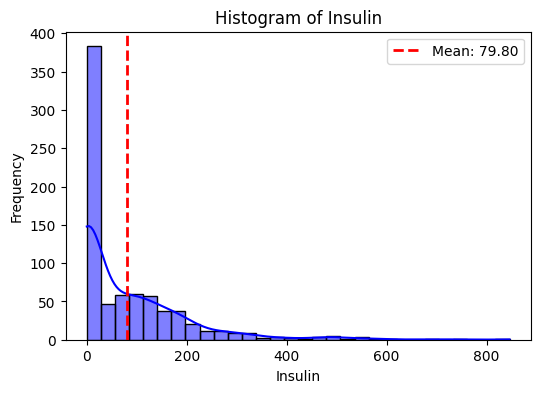

In [ ]:
plt.figure(figsize=(6, 4))
sns.histplot(df["Insulin"], bins=30, kde=True, color='blue')
plt.axvline(df["Insulin"].mean(), color='red', linestyle='dashed', linewidth=2, label=f"Mean: {df['Insulin'].mean():.2f}")
plt.title("Histogram of Insulin")
plt.xlabel("Insulin")
plt.ylabel("Frequency")
plt.legend()
plt.show()


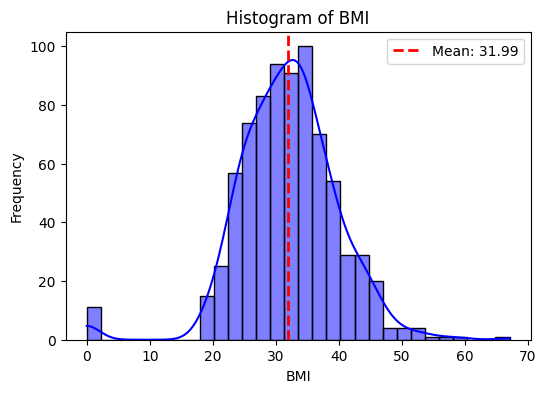

In [ ]:
plt.figure(figsize=(6, 4))
sns.histplot(df["BMI"], bins=30, kde=True, color='blue')
plt.axvline(df["BMI"].mean(), color='red', linestyle='dashed', linewidth=2, label=f"Mean: {df['BMI'].mean():.2f}")
plt.title("Histogram of BMI")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.legend()
plt.show()


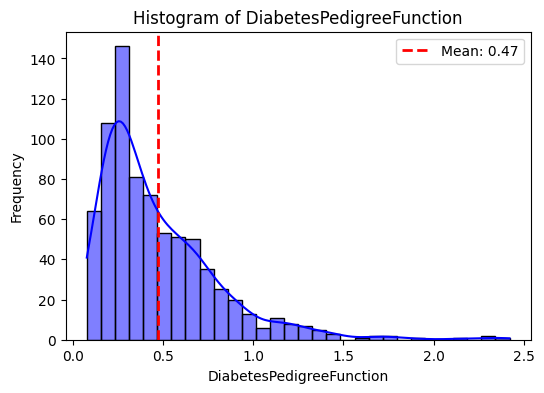

In [ ]:
plt.figure(figsize=(6, 4))
sns.histplot(df["DiabetesPedigreeFunction"], bins=30, kde=True, color='blue')
plt.axvline(df["DiabetesPedigreeFunction"].mean(), color='red', linestyle='dashed', linewidth=2, label=f"Mean: {df['DiabetesPedigreeFunction'].mean():.2f}")
plt.title("Histogram of DiabetesPedigreeFunction")
plt.xlabel("DiabetesPedigreeFunction")
plt.ylabel("Frequency")
plt.legend()
plt.show()


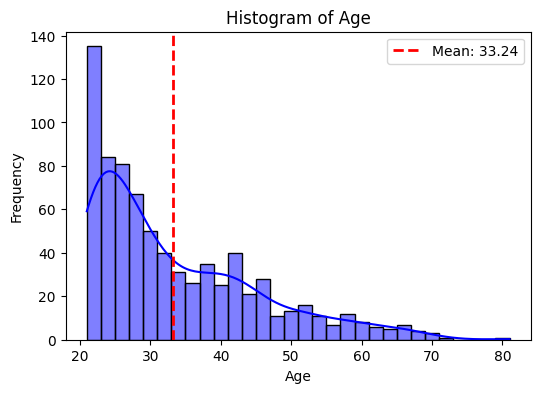

In [ ]:
plt.figure(figsize=(6, 4))
sns.histplot(df["Age"], bins=30, kde=True, color='blue')
plt.axvline(df["Age"].mean(), color='red', linestyle='dashed', linewidth=2, label=f"Mean: {df['Age'].mean():.2f}")
plt.title("Histogram of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.legend()
plt.show()


## T-test

In [ ]:
import pandas as pd
from scipy.stats import ttest_ind

# โหลดชุดข้อมูล (ตรวจสอบให้แน่ใจว่าไฟล์อยู่ในไดเรกทอรี)
df = pd.read_csv('diabetes.csv')

# รายการ features ที่ต้องการใช้ T-test (เฉพาะตัวเลข ไม่รวม Outcome)
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
            'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# วนลูปทำ T-test สำหรับแต่ละ feature
results = {}
for feature in features:
    group_0 = df[df['Outcome'] == 0][feature]  # กลุ่มที่ไม่เป็นเบาหวาน
    group_1 = df[df['Outcome'] == 1][feature]  # กลุ่มที่เป็นเบาหวาน

    t_stat, p_value = ttest_ind(group_0, group_1, equal_var=False)  # Welch's T-test (ไม่จำเป็นต้องมี variance เท่ากัน)
    results[feature] = {'T-statistic': t_stat, 'P-value': p_value}

# แสดงผลลัพธ์
for feature, result in results.items():
    print(f"{feature}: T-statistic = {result['T-statistic']:.4f}, P-value = {result['P-value']:.4f}")

    # เช็คว่ามีความแตกต่างทางสถิติหรือไม่
    if result['P-value'] < 0.05:
        print(f"   -> 🔥 {feature} มีความแตกต่างอย่างมีนัยสำคัญระหว่างผู้ป่วยเบาหวานและไม่เป็นเบาหวาน (p < 0.05)")
    else:
        print(f"   -> ✅ {feature} ไม่มีความแตกต่างอย่างมีนัยสำคัญ (p >= 0.05)")


Pregnancies: T-statistic = -5.9070, P-value = 0.0000
   -> 🔥 Pregnancies มีความแตกต่างอย่างมีนัยสำคัญระหว่างผู้ป่วยเบาหวานและไม่เป็นเบาหวาน (p < 0.05)
Glucose: T-statistic = -13.7515, P-value = 0.0000
   -> 🔥 Glucose มีความแตกต่างอย่างมีนัยสำคัญระหว่างผู้ป่วยเบาหวานและไม่เป็นเบาหวาน (p < 0.05)
BloodPressure: T-statistic = -1.7131, P-value = 0.0874
   -> ✅ BloodPressure ไม่มีความแตกต่างอย่างมีนัยสำคัญ (p >= 0.05)
SkinThickness: T-statistic = -1.9706, P-value = 0.0494
   -> 🔥 SkinThickness มีความแตกต่างอย่างมีนัยสำคัญระหว่างผู้ป่วยเบาหวานและไม่เป็นเบาหวาน (p < 0.05)
Insulin: T-statistic = -3.3009, P-value = 0.0010
   -> 🔥 Insulin มีความแตกต่างอย่างมีนัยสำคัญระหว่างผู้ป่วยเบาหวานและไม่เป็นเบาหวาน (p < 0.05)
BMI: T-statistic = -8.6193, P-value = 0.0000
   -> 🔥 BMI มีความแตกต่างอย่างมีนัยสำคัญระหว่างผู้ป่วยเบาหวานและไม่เป็นเบาหวาน (p < 0.05)
DiabetesPedigreeFunction: T-statistic = -4.5768, P-value = 0.0000
   -> 🔥 DiabetesPedigreeFunction มีความแตกต่างอย่างมีนัยสำคัญระหว่างผู้ป่วยเบาหวานและ

## ANOVA

In [ ]:
import pandas as pd
from scipy.stats import f_oneway

# โหลดชุดข้อมูล (ตรวจสอบว่าไฟล์อยู่ในไดเรกทอรี)
df = pd.read_csv('diabetes.csv')

# ✅ สร้างกลุ่มอายุ
df['AgeGroup'] = pd.cut(df['Age'], bins=[20, 30, 40, 50, 60, 100], labels=['20-30', '31-40', '41-50', '51-60', '60+'])

# ✅ สร้างกลุ่ม BMI
df['BMIGroup'] = pd.cut(df['BMI'], bins=[0, 18.5, 25, 30, 100], labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

# รายการ features ที่จะทดสอบ ANOVA
features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'Pregnancies', 'DiabetesPedigreeFunction']

# ทำ ANOVA สำหรับแต่ละ feature โดยใช้กลุ่มอายุ
print("\n🔹 ANOVA เปรียบเทียบด้วยกลุ่มอายุ (AgeGroup)")
for feature in features:
    groups = [df[df['AgeGroup'] == age][feature].dropna() for age in df['AgeGroup'].unique()]
    f_stat, p_value = f_oneway(*groups)

    print(f"{feature}: F-statistic = {f_stat:.4f}, P-value = {p_value:.4f}")
    if p_value < 0.05:
        print(f"   -> 🔥 {feature} มีความแตกต่างอย่างมีนัยสำคัญระหว่างกลุ่มอายุ (p < 0.05)")
    else:
        print(f"   -> ✅ {feature} ไม่มีความแตกต่างอย่างมีนัยสำคัญระหว่างกลุ่มอายุ (p >= 0.05)")

# ทำ ANOVA สำหรับแต่ละ feature โดยใช้กลุ่ม BMI
print("\n🔹 ANOVA เปรียบเทียบด้วยกลุ่ม BMI (BMIGroup)")
for feature in features:
    groups = [df[df['BMIGroup'] == bmi][feature].dropna() for bmi in df['BMIGroup'].unique()]
    f_stat, p_value = f_oneway(*groups)

    print(f"{feature}: F-statistic = {f_stat:.4f}, P-value = {p_value:.4f}")
    if p_value < 0.05:
        print(f"   -> 🔥 {feature} มีความแตกต่างอย่างมีนัยสำคัญระหว่างกลุ่ม BMI (p < 0.05)")
    else:
        print(f"   -> ✅ {feature} ไม่มีความแตกต่างอย่างมีนัยสำคัญระหว่างกลุ่ม BMI (p >= 0.05)")



🔹 ANOVA เปรียบเทียบด้วยกลุ่มอายุ (AgeGroup)
Glucose: F-statistic = 14.0927, P-value = 0.0000
   -> 🔥 Glucose มีความแตกต่างอย่างมีนัยสำคัญระหว่างกลุ่มอายุ (p < 0.05)
BloodPressure: F-statistic = 12.1830, P-value = 0.0000
   -> 🔥 BloodPressure มีความแตกต่างอย่างมีนัยสำคัญระหว่างกลุ่มอายุ (p < 0.05)
SkinThickness: F-statistic = 3.1939, P-value = 0.0129
   -> 🔥 SkinThickness มีความแตกต่างอย่างมีนัยสำคัญระหว่างกลุ่มอายุ (p < 0.05)
Insulin: F-statistic = 5.4385, P-value = 0.0003
   -> 🔥 Insulin มีความแตกต่างอย่างมีนัยสำคัญระหว่างกลุ่มอายุ (p < 0.05)
Pregnancies: F-statistic = 119.6682, P-value = 0.0000
   -> 🔥 Pregnancies มีความแตกต่างอย่างมีนัยสำคัญระหว่างกลุ่มอายุ (p < 0.05)
DiabetesPedigreeFunction: F-statistic = 2.6737, P-value = 0.0310
   -> 🔥 DiabetesPedigreeFunction มีความแตกต่างอย่างมีนัยสำคัญระหว่างกลุ่มอายุ (p < 0.05)

🔹 ANOVA เปรียบเทียบด้วยกลุ่ม BMI (BMIGroup)
Glucose: F-statistic = nan, P-value = nan
   -> ✅ Glucose ไม่มีความแตกต่างอย่างมีนัยสำคัญระหว่างกลุ่ม BMI (p >= 0.05)
Bl

/usr/local/lib/python3.11/dist-packages/scipy/stats/_stats_py.py:4102: DegenerateDataWarning: at least one input has length 0
  if _f_oneway_is_too_small(samples):


## Group by

In [ ]:
df.groupby("Outcome").mean()


Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
Outcome                                                                      
0           3.298000  109.980000      68.184000      19.664000   68.792000   
1           4.865672  141.257463      70.824627      22.164179  100.335821   

               BMI  DiabetesPedigreeFunction        Age  
Outcome                                                  
0        30.304200                  0.429734  31.190000  
1        35.142537                  0.550500  37.067164

In [ ]:
df.groupby(["Pregnancies", "Outcome"])[["Glucose", "BMI"]].mean()


Glucose        BMI
Pregnancies Outcome                       
0           0        111.945205  31.727397
            1        144.236842  39.213158
1           0        104.254717  29.616038
            1        143.793103  37.793103
2           0        105.214286  29.679762
            1        135.473684  34.578947
3           0        109.604167  29.231250
            1        148.444444  32.548148
4           0        117.555556  31.255556
            1        139.913043  33.873913
5           0        111.666667  31.100000
            1        131.190476  36.780952
6           0        115.352941  29.591176
            1        132.375000  31.775000
7           0        121.000000  29.975000
            1        148.800000  34.756000
8           0        106.625000  30.693750
            1        150.000000  32.204545
9           0        107.000000  28.840000
            1        144.944444  33.300000
10          0        117.571429  30.114286
            1        125.600000  31.380000
11          0        113.250000  37.125000
            1        134.000000  39.385714
12          0        111.000000  30.560000
            1        116.750000  34.575000
13          0        117.200000  33.280000
            1        133.800000  36.720000
14          1        137.500000  35.100000
15          1        136.000000  37.100000
17          1        163.000000  40.900000

In [ ]:
df.groupby("Outcome").agg(["mean", "std", "min", "max"])


Pregnancies                       Glucose                      \
               mean       std min max        mean        std min  max   
Outcome                                                                 
0          3.298000  3.017185   0  13  109.980000  26.141200   0  197   
1          4.865672  3.741239   0  17  141.257463  31.939622   0  199   

        BloodPressure             ...  BMI       DiabetesPedigreeFunction  \
                 mean        std  ...  min   max                     mean   
Outcome                           ...                                       
0           68.184000  18.063075  ...  0.0  57.3                 0.429734   
1           70.824627  21.491812  ...  0.0  67.1                 0.550500   

                                       Age                     
              std    min    max       mean        std min max  
Outcome                                                        
0        0.299085  0.078  2.329  31.190000  11.667655  21  81  
1        0.372354  0.088  2.420  37.067164  10.968254  21  70  

[2 rows x 32 columns]

In [ ]:
df.groupby("Outcome")["Pregnancies"].count()

Outcome
0    500
1    268
Name: Pregnancies, dtype: int64

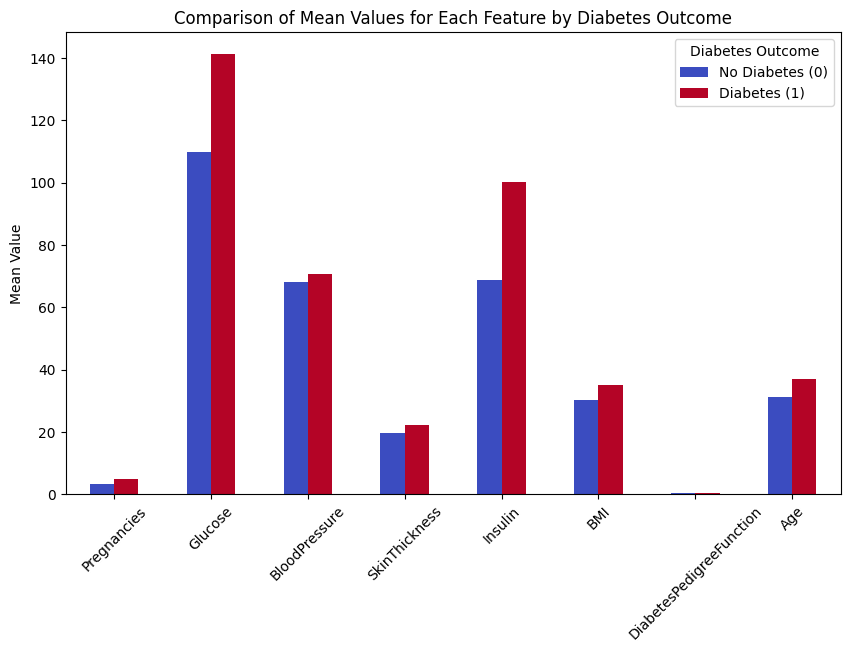

In [ ]:
import matplotlib.pyplot as plt

grouped_data = df.groupby("Outcome").mean()

grouped_data.T.plot(kind="bar", figsize=(10, 6), colormap="coolwarm")
plt.title("Comparison of Mean Values for Each Feature by Diabetes Outcome")
plt.ylabel("Mean Value")
plt.xticks(rotation=45)
plt.legend(title="Diabetes Outcome", labels=["No Diabetes (0)", "Diabetes (1)"])
plt.show()


## S.D.

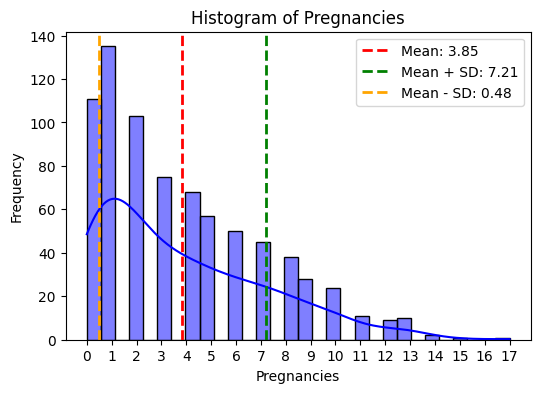

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

feature = "Pregnancies"
mean_val = df[feature].mean()
std_val = df[feature].std()

plt.figure(figsize=(6, 4))
sns.histplot(df[feature], bins=30, kde=True, color='blue')

plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=2, label=f"Mean: {mean_val:.2f}")
plt.axvline(mean_val + std_val, color='green', linestyle='dashed', linewidth=2, label=f"Mean + SD: {mean_val + std_val:.2f}")
plt.axvline(mean_val - std_val, color='orange', linestyle='dashed', linewidth=2, label=f"Mean - SD: {mean_val - std_val:.2f}")

plt.title(f"Histogram of {feature}")
plt.xlabel(feature)
plt.ylabel("Frequency")
plt.legend()

#กำหนดให้ค่าในแกน x เป็นจำนวนเต็ม
min_x, max_x = plt.xlim()
plt.xticks(np.arange(int(min_x), int(max_x) + 1, 1))

plt.show()

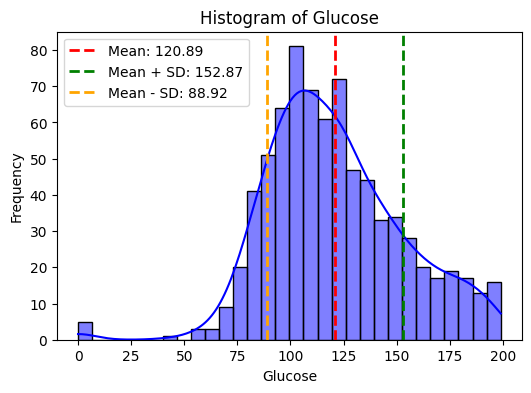

In [ ]:
feature = "Glucose"
mean_val = df[feature].mean()
std_val = df[feature].std()

plt.figure(figsize=(6, 4))
sns.histplot(df[feature], bins=30, kde=True, color='blue')

plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=2, label=f"Mean: {mean_val:.2f}")
plt.axvline(mean_val + std_val, color='green', linestyle='dashed', linewidth=2, label=f"Mean + SD: {mean_val + std_val:.2f}")
plt.axvline(mean_val - std_val, color='orange', linestyle='dashed', linewidth=2, label=f"Mean - SD: {mean_val - std_val:.2f}")

plt.title(f"Histogram of {feature}")
plt.xlabel(feature)
plt.ylabel("Frequency")
plt.legend()
plt.show()


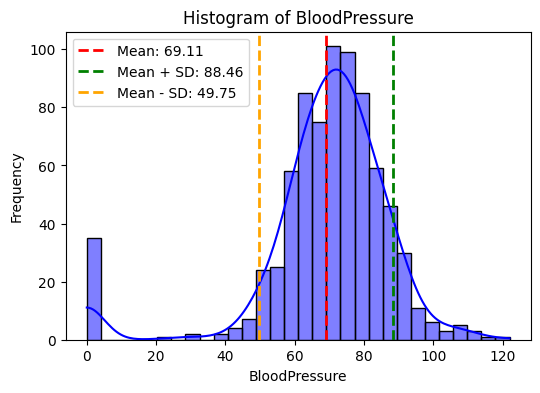

In [ ]:
feature = "BloodPressure"
mean_val = df[feature].mean()
std_val = df[feature].std()

plt.figure(figsize=(6, 4))
sns.histplot(df[feature], bins=30, kde=True, color='blue')

plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=2, label=f"Mean: {mean_val:.2f}")
plt.axvline(mean_val + std_val, color='green', linestyle='dashed', linewidth=2, label=f"Mean + SD: {mean_val + std_val:.2f}")
plt.axvline(mean_val - std_val, color='orange', linestyle='dashed', linewidth=2, label=f"Mean - SD: {mean_val - std_val:.2f}")

plt.title(f"Histogram of {feature}")
plt.xlabel(feature)
plt.ylabel("Frequency")
plt.legend()
plt.show()


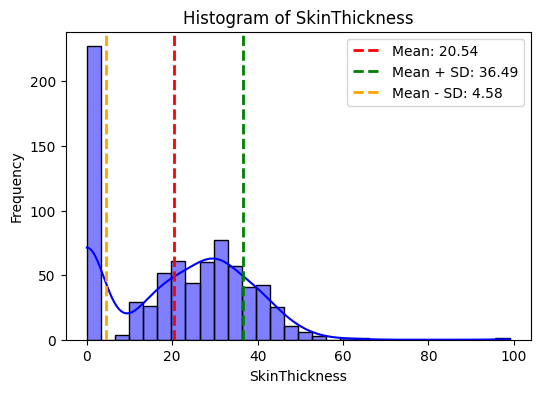

In [ ]:
feature = "SkinThickness"
mean_val = df[feature].mean()
std_val = df[feature].std()

plt.figure(figsize=(6, 4))
sns.histplot(df[feature], bins=30, kde=True, color='blue')

plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=2, label=f"Mean: {mean_val:.2f}")
plt.axvline(mean_val + std_val, color='green', linestyle='dashed', linewidth=2, label=f"Mean + SD: {mean_val + std_val:.2f}")
plt.axvline(mean_val - std_val, color='orange', linestyle='dashed', linewidth=2, label=f"Mean - SD: {mean_val - std_val:.2f}")

plt.title(f"Histogram of {feature}")
plt.xlabel(feature)
plt.ylabel("Frequency")
plt.legend()
plt.show()


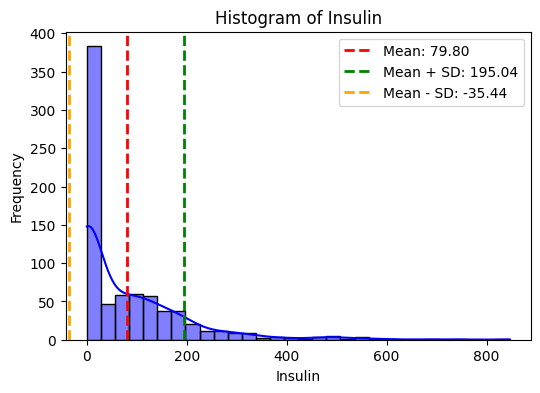

In [ ]:
feature = "Insulin"
mean_val = df[feature].mean()
std_val = df[feature].std()

plt.figure(figsize=(6, 4))
sns.histplot(df[feature], bins=30, kde=True, color='blue')

plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=2, label=f"Mean: {mean_val:.2f}")
plt.axvline(mean_val + std_val, color='green', linestyle='dashed', linewidth=2, label=f"Mean + SD: {mean_val + std_val:.2f}")
plt.axvline(mean_val - std_val, color='orange', linestyle='dashed', linewidth=2, label=f"Mean - SD: {mean_val - std_val:.2f}")

plt.title(f"Histogram of {feature}")
plt.xlabel(feature)
plt.ylabel("Frequency")
plt.legend()
plt.show()


In [ ]:
feature = "BMI"
mean_val = df[feature].mean()
std_val = df[feature].std()

plt.figure(figsize=(6, 4))
sns.histplot(df[feature], bins=30, kde=True, color='blue')

plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=2, label=f"Mean: {mean_val:.2f}")
plt.axvline(mean_val + std_val, color='green', linestyle='dashed', linewidth=2, label=f"Mean + SD: {mean_val + std_val:.2f}")
plt.axvline(mean_val - std_val, color='orange', linestyle='dashed', linewidth=2, label=f"Mean - SD: {mean_val - std_val:.2f}")

plt.title(f"Histogram of {feature}")
plt.xlabel(feature)
plt.ylabel("Frequency")
plt.legend()
plt.show()


In [ ]:
feature = "DiabetesPedigreeFunction"
mean_val = df[feature].mean()
std_val = df[feature].std()

plt.figure(figsize=(6, 4))
sns.histplot(df[feature], bins=30, kde=True, color='blue')

plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=2, label=f"Mean: {mean_val:.2f}")
plt.axvline(mean_val + std_val, color='green', linestyle='dashed', linewidth=2, label=f"Mean + SD: {mean_val + std_val:.2f}")
plt.axvline(mean_val - std_val, color='orange', linestyle='dashed', linewidth=2, label=f"Mean - SD: {mean_val - std_val:.2f}")

plt.title(f"Histogram of {feature}")
plt.xlabel(feature)
plt.ylabel("Frequency")
plt.legend()
plt.show()


In [ ]:
feature = "Age"
mean_val = df[feature].mean()
std_val = df[feature].std()

plt.figure(figsize=(6, 4))
sns.histplot(df[feature], bins=30, kde=True, color='blue')

plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=2, label=f"Mean: {mean_val:.2f}")
plt.axvline(mean_val + std_val, color='green', linestyle='dashed', linewidth=2, label=f"Mean + SD: {mean_val + std_val:.2f}")
plt.axvline(mean_val - std_val, color='orange', linestyle='dashed', linewidth=2, label=f"Mean - SD: {mean_val - std_val:.2f}")

plt.title(f"Histogram of {feature}")
plt.xlabel(feature)
plt.ylabel("Frequency")
plt.legend()
plt.show()


## max min

In [ ]:
min_max_values = df.agg(["min", "max"])

#Transpose the result for easier plotting
min_max_values = min_max_values.T

#Create the pie chart
plt.figure(figsize=(10, 8))

for column in min_max_values.index:
    # Extract min and max values
    min_val = min_max_values.loc[column, 'min']
    max_val = min_max_values.loc[column, 'max']

    # Create labels and sizes for the pie chart
    labels = [f'Min: {min_val}', f'Max: {max_val}']
    sizes = [min_val, max_val]

    # Create the pie chart for each column
    plt.subplot(3, 3, list(df.columns).index(column)+1) # Adjust subplot grid as needed
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.title(f'{column} Min/Max')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

## boxplot

In [ ]:
# prompt:  remove outlier

# Assuming 'df' is your DataFrame as defined in the previous code

def remove_outliers_iqr(df, columns):
    """Removes outliers from specified columns using the IQR method.

    Args:
        df: The pandas DataFrame.
        columns: A list of column names to process.

    Returns:
        A new DataFrame with outliers removed.
    """
    df_cleaned = df.copy()
    for col in columns:
        Q1 = df_cleaned[col].quantile(0.25)
        Q3 = df_cleaned[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_cleaned = df_cleaned[df_cleaned[col].between(lower_bound, upper_bound)]  # Use .between() for efficiency
    return df_cleaned

# Example usage:
# Specify the columns with potential outliers
columns_to_clean = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Remove outliers
df_no_outliers = remove_outliers_iqr(df, columns_to_clean)

# Print the shape of the original and cleaned DataFrames (optional)
print("Original DataFrame shape:", df.shape)
print("DataFrame shape after outlier removal:", df_no_outliers.shape)



Original DataFrame shape: (768, 9)
DataFrame shape after outlier removal: (645, 9)


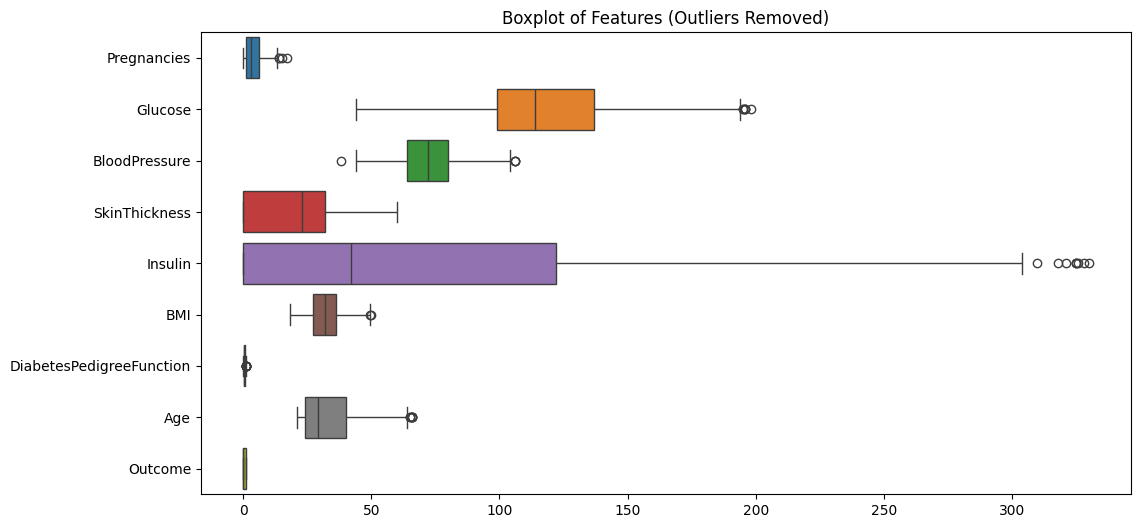

In [ ]:
# Create the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_no_outliers, orient="h")
plt.title("Boxplot of Features (Outliers Removed)")
plt.show()


## pairplot


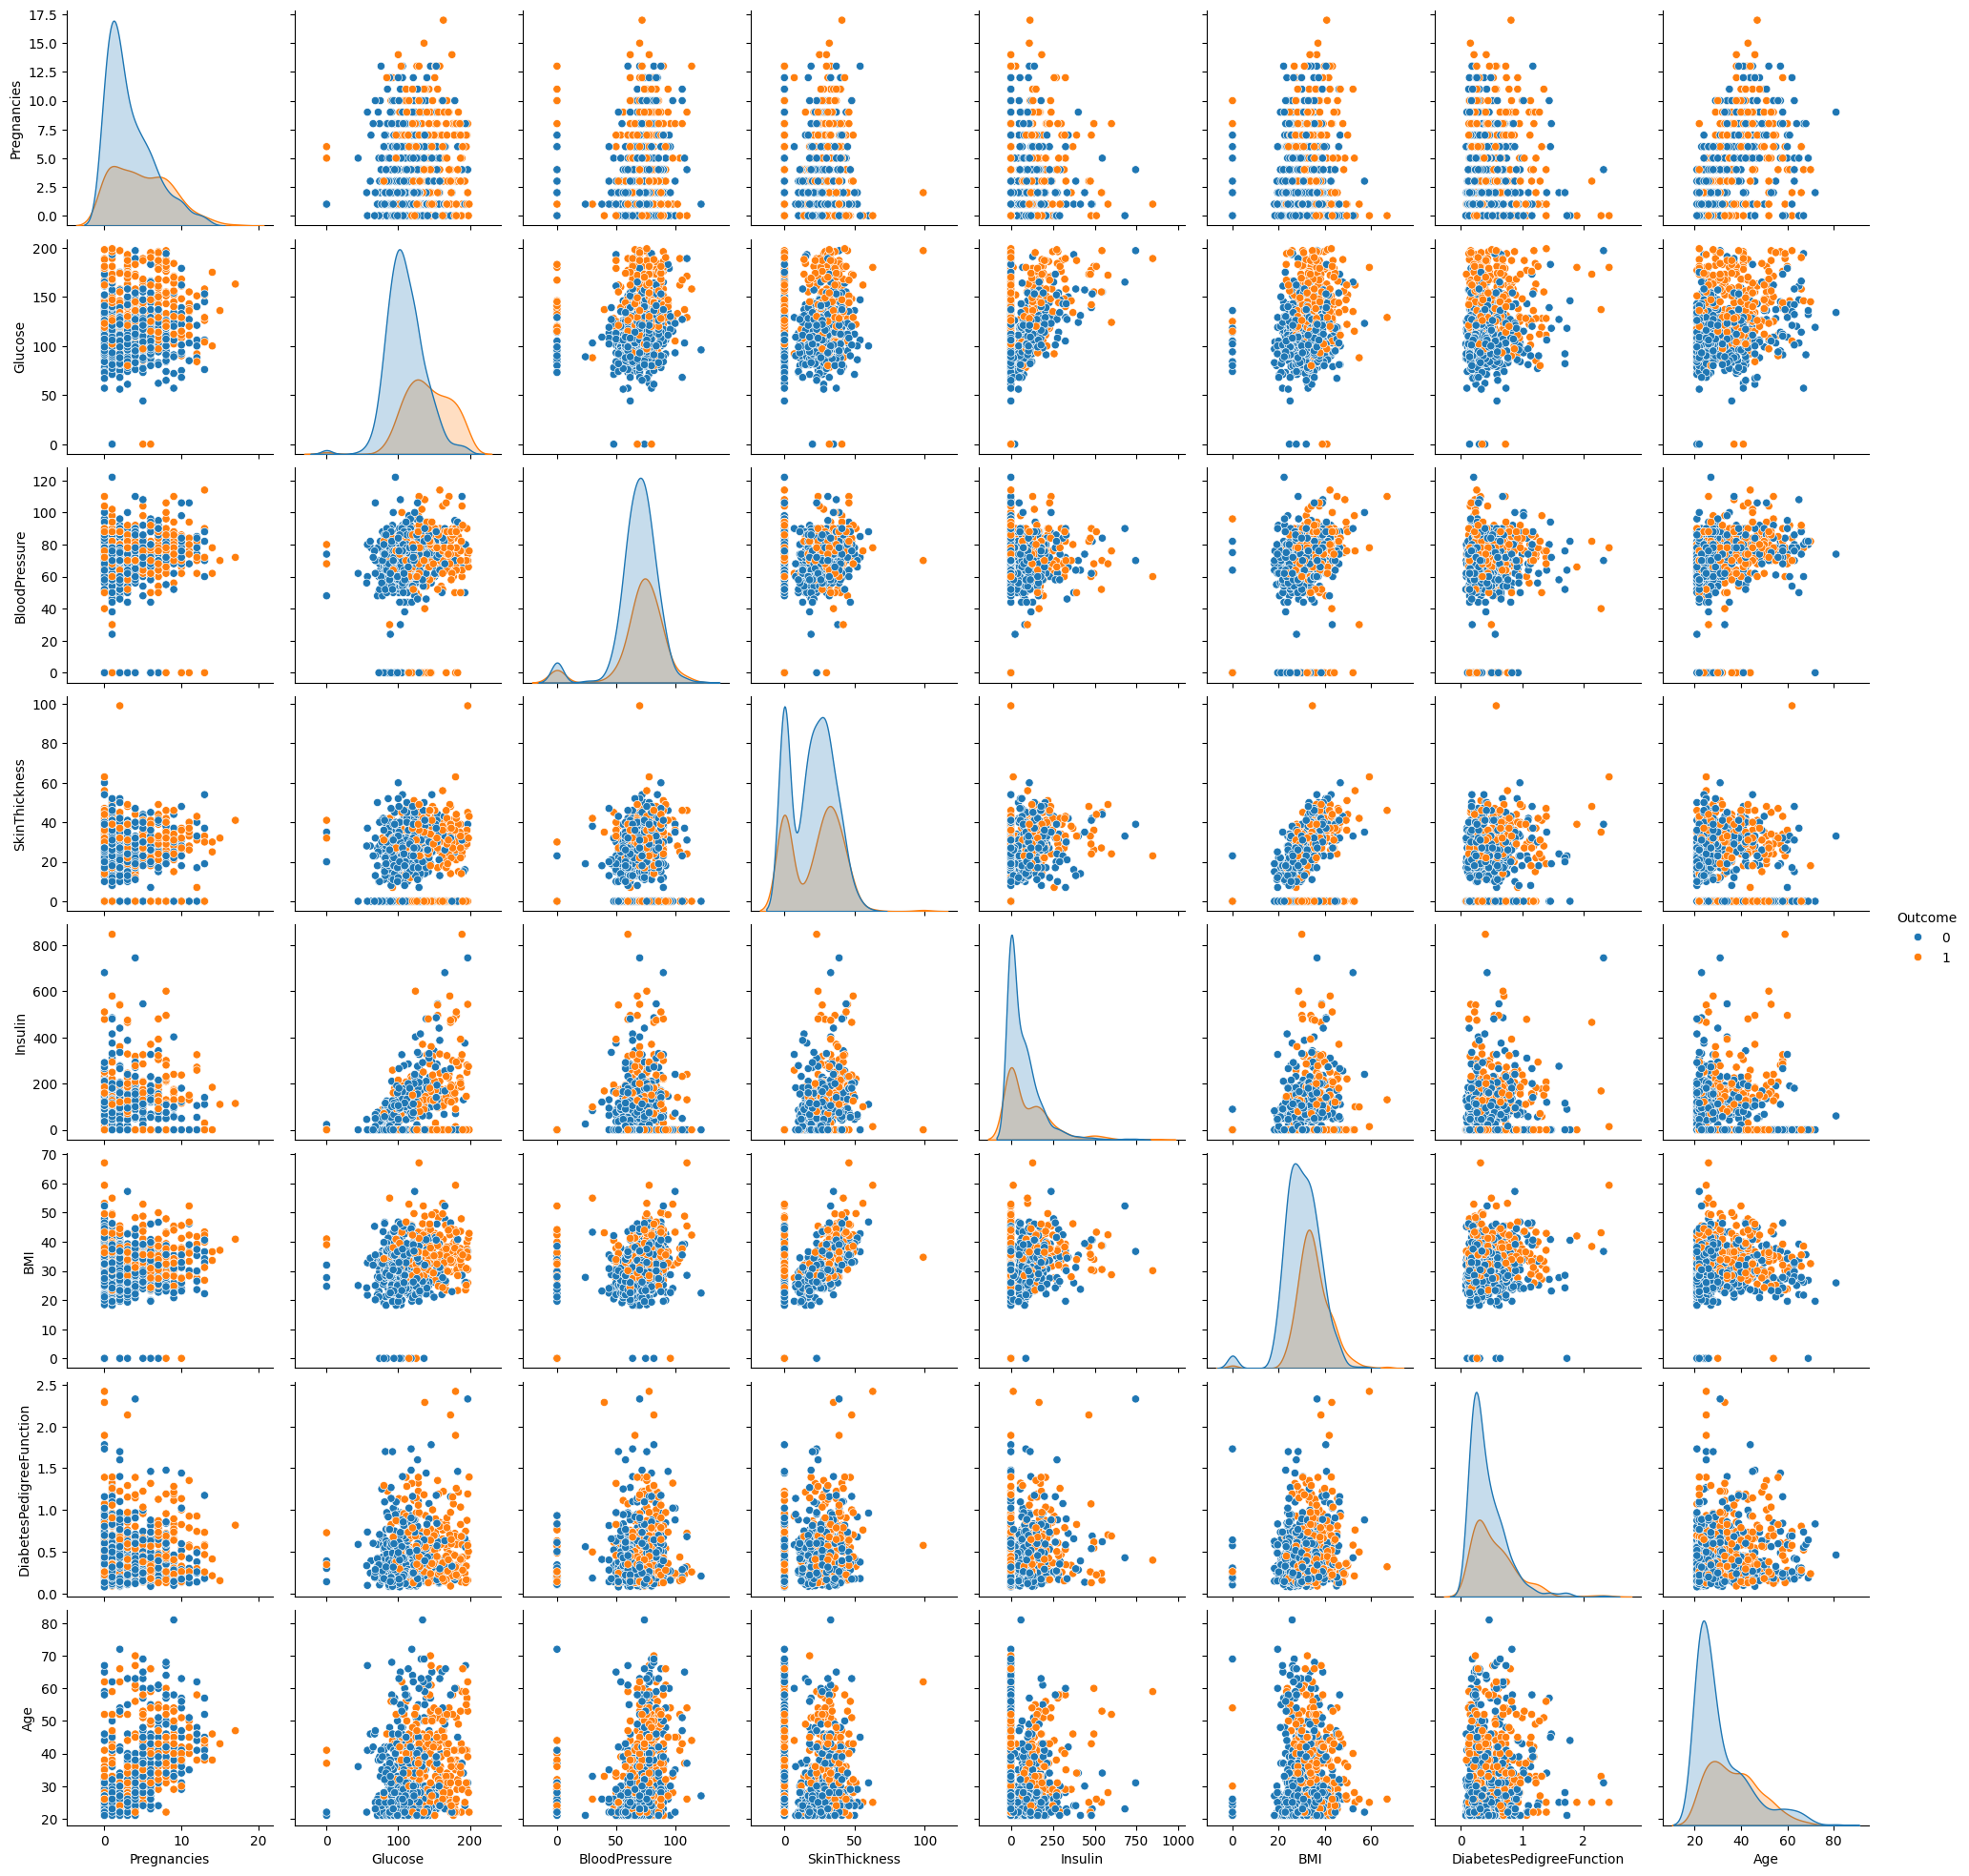

In [ ]:
# Create the pairplot
sns.pairplot(df, hue='Outcome', diag_kind='kde') # Use 'kde' for kernel density estimate on the diagonal
plt.show()


## correlation matrix

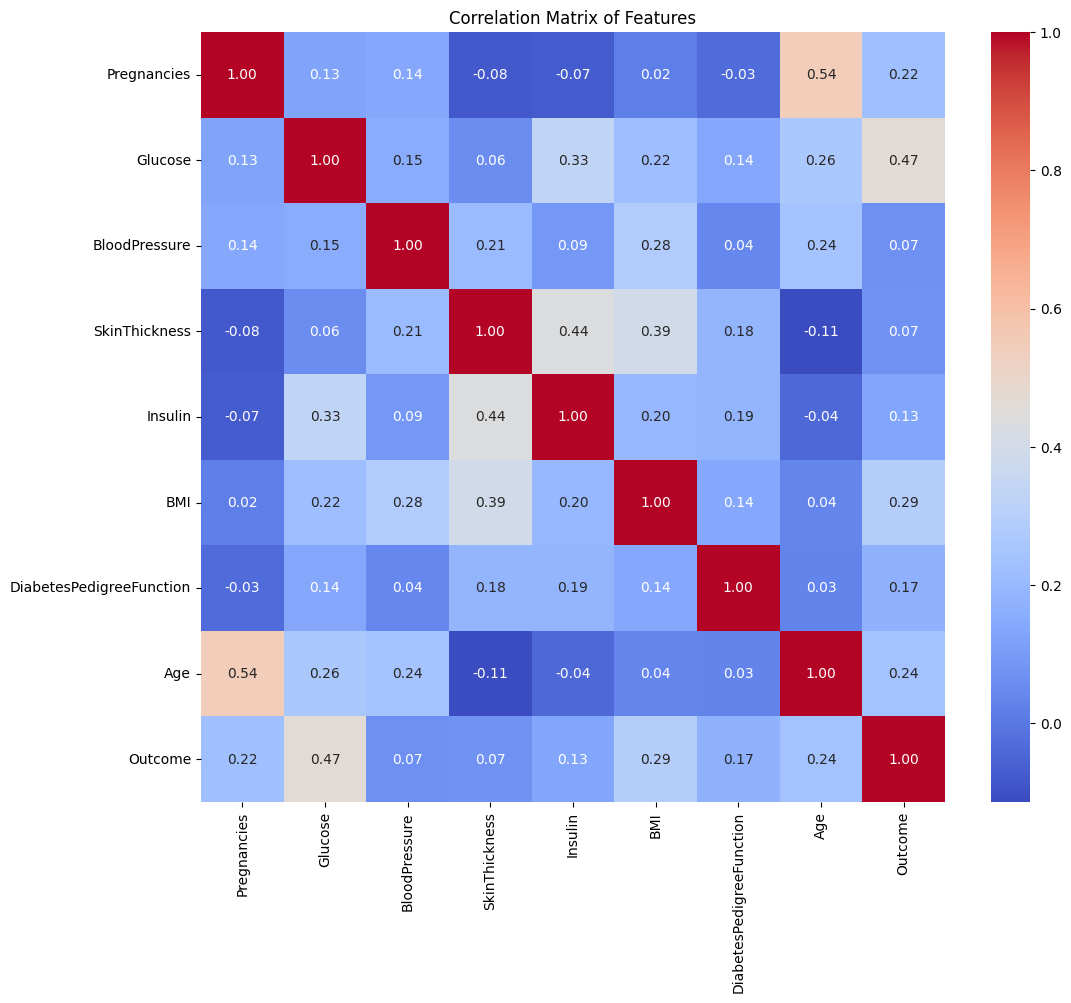

In [ ]:
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()


# Model prediction

##Logistics Regression

## Case 1

### without nomalization and SMOTE

In [ ]:
X = df.drop(columns=["Outcome"])
y = df["Outcome"]

# แบ่งข้อมูลเป็น Train และ Test set (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# สร้าง Logistic Regression Model (ไม่ทำ Normalization)
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# ทำนายผล
y_pred = model.predict(X_test)

# ประเมินผล
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7143
Confusion Matrix:
 [[82 18]
 [26 28]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.82      0.79       100
           1       0.61      0.52      0.56        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.71      0.71      0.71       154



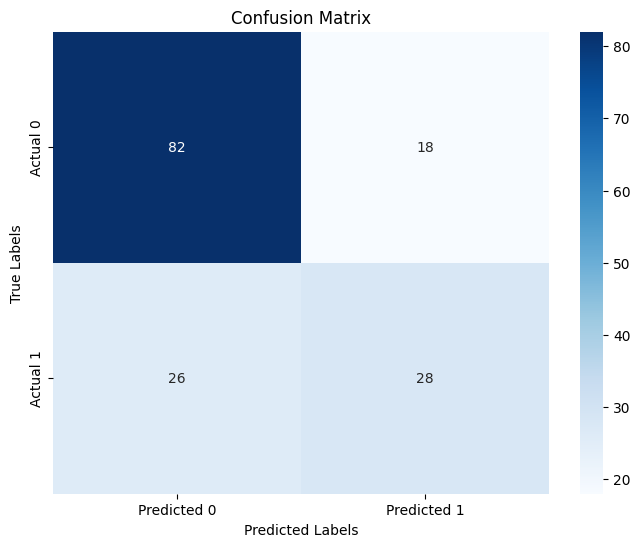

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


##Case 2

###  nomalization and without SMOTE

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
# แยก Features และ Target
X = df.drop("Outcome", axis=1)
y =df["Outcome"]

# แบ่งข้อมูลเป็น Train และ Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# ทำ Standardization ด้วย Z-score normalization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# สร้าง Logistic Regression Model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# ทำนายผลและประเมินผลลัพธ์
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)


Accuracy: 0.7143
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.82      0.79       100
           1       0.61      0.52      0.56        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.71      0.71      0.71       154



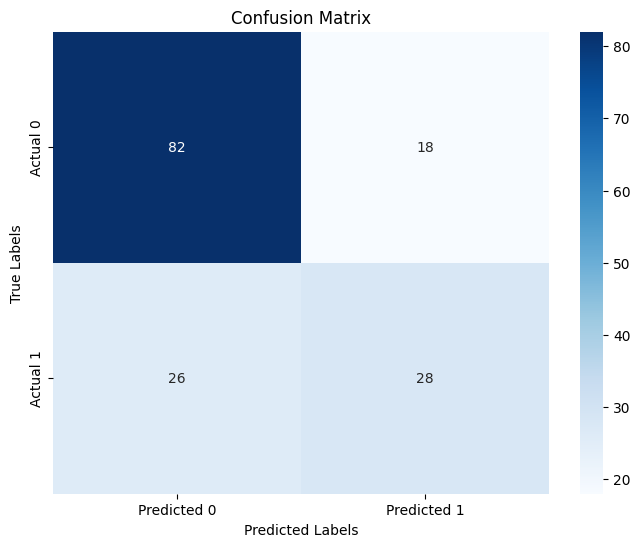

In [ ]:

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


## Case 3


### without data normalization with SMOTE

In [ ]:
# แยก Features และ Target
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# แบ่งข้อมูลเป็น Train และ Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# ใช้ SMOTE เพื่อเพิ่มจำนวนตัวอย่างในคลาสที่มีจำนวนน้อย
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# สร้าง Logistic Regression Model
model = LogisticRegression()
model.fit(X_train_resampled, y_train_resampled)

# ทำนายผลและประเมินผลลัพธ์
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)


Accuracy: 0.7338
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.75      0.79       100
           1       0.60      0.70      0.65        54

    accuracy                           0.73       154
   macro avg       0.71      0.73      0.72       154
weighted avg       0.75      0.73      0.74       154



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


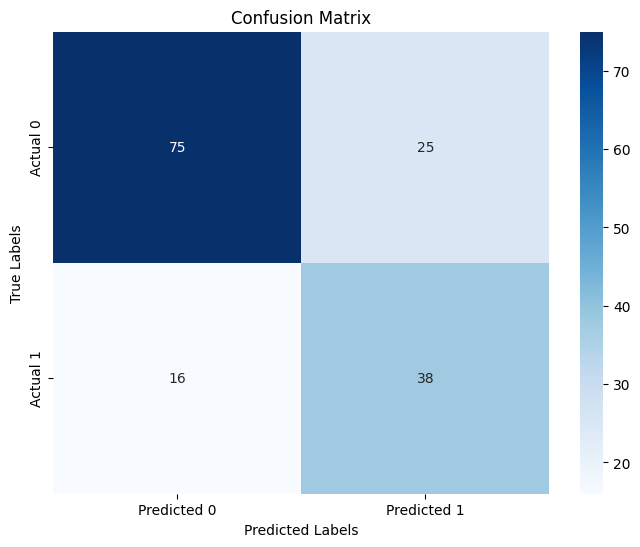

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


## Case 4

### With data normalization with SMOTE

Accuracy: 0.7402597402597403
Confusion Matrix:
 [[76 24]
 [16 38]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.76      0.79       100
           1       0.61      0.70      0.66        54

    accuracy                           0.74       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.75      0.74      0.74       154



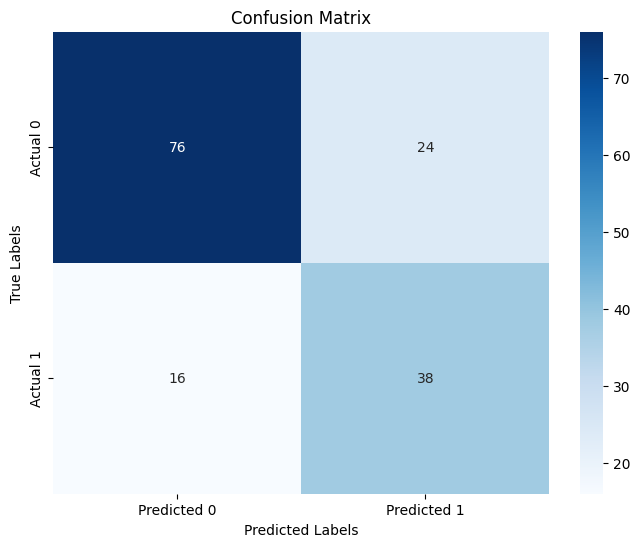

In [ ]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# ตรวจสอบและแปลงค่าที่ไม่ใช่ตัวเลขให้เป็น NaN
for col in X_train.columns:
    X_train[col] = pd.to_numeric(X_train[col], errors='coerce')
    X_test[col] = pd.to_numeric(X_test[col], errors='coerce')

# แทนค่า NaN ด้วยค่ามัธยฐานของแต่ละคอลัมน์
X_train.fillna(X_train.median(), inplace=True)
X_test.fillna(X_test.median(), inplace=True)

# 3. ทำ Normalization (StandardScaler)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. ใช้ SMOTE เพื่อ balance ข้อมูล
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# 5. Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train_resampled, y_train_resampled)

# 6. ทดสอบโมเดล
y_pred = model.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

## Decisions tree

## Case 1

### without nomalization and SMOTE

In [ ]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y )


def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)
    plt.show()

# 1. Without Normalization & Without SMOTE
clf1 = DecisionTreeClassifier(max_depth=5, random_state=42)
clf1.fit(X_train, y_train)
y_pred1 = clf1.predict(X_test)
print("Accuracy - Without Normalization & Without SMOTE:", accuracy_score(y_test, y_pred1))
print("Classification Report:\n", classification_report(y_test, y_pred1))
plot_confusion_matrix(y_test, y_pred1, "Confusion Matrix - Without Normalization & Without SMOTE")


Accuracy - Without Normalization & Without SMOTE: 0.7922077922077922
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.84      0.84       100
           1       0.70      0.70      0.70        54

    accuracy                           0.79       154
   macro avg       0.77      0.77      0.77       154
weighted avg       0.79      0.79      0.79       154



## Case 2

### nomalization and without SMOTE

In [ ]:
# 2. With Normalization & Without SMOTE
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
clf2 = DecisionTreeClassifier(max_depth=5, random_state=42)
clf2.fit(X_train_scaled, y_train)
y_pred2 = clf2.predict(X_test_scaled)
print("Accuracy - With Normalization & Without SMOTE:", accuracy_score(y_test, y_pred2))
print("Classification Report:\n", classification_report(y_test, y_pred2))
plot_confusion_matrix(y_test, y_pred2, "Confusion Matrix - With Normalization & Without SMOTE")


Accuracy - With Normalization & Without SMOTE: 0.7207792207792207
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.85      0.80       100
           1       0.63      0.48      0.55        54

    accuracy                           0.72       154
   macro avg       0.69      0.67      0.67       154
weighted avg       0.71      0.72      0.71       154



## Case 3

### without data normalization with SMOTE

In [ ]:
# 3. Without Normalization & With SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
clf3 = DecisionTreeClassifier(max_depth=5, random_state=42)
clf3.fit(X_train_resampled, y_train_resampled)
y_pred3 = clf3.predict(X_test)
print("Accuracy - Without Normalization & With SMOTE:", accuracy_score(y_test, y_pred3))
print("Classification Report:\n", classification_report(y_test, y_pred3))
plot_confusion_matrix(y_test, y_pred3, "Confusion Matrix - Without Normalization & With SMOTE")


Accuracy - Without Normalization & With SMOTE: 0.7662337662337663
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.86      0.83       100
           1       0.70      0.59      0.64        54

    accuracy                           0.77       154
   macro avg       0.75      0.73      0.73       154
weighted avg       0.76      0.77      0.76       154



## Case 4

### With data normalization with SMOTE

In [ ]:
# 4. With Normalization & With SMOTE
X_train_resampled_scaled, y_train_resampled_scaled = smote.fit_resample(X_train_scaled, y_train)
clf4 = DecisionTreeClassifier(max_depth=50, random_state=42)
clf4.fit(X_train_resampled_scaled, y_train_resampled_scaled)
y_pred4 = clf4.predict(X_test_scaled)
print("Accuracy - With Normalization & With SMOTE:", accuracy_score(y_test, y_pred4))
print("Classification Report:\n", classification_report(y_test, y_pred4))
plot_confusion_matrix(y_test, y_pred4, "Confusion Matrix - With Normalization & With SMOTE")


Accuracy - With Normalization & With SMOTE: 0.7337662337662337
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.78      0.79       100
           1       0.61      0.65      0.63        54

    accuracy                           0.73       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.74      0.73      0.74       154



## Random forest

## Case 1

### without nomalization and SMOTE

Accuracy - Without Normalization & Without SMOTE: 0.7597402597402597
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.85      0.82       100
           1       0.68      0.59      0.63        54

    accuracy                           0.76       154
   macro avg       0.74      0.72      0.73       154
weighted avg       0.75      0.76      0.76       154



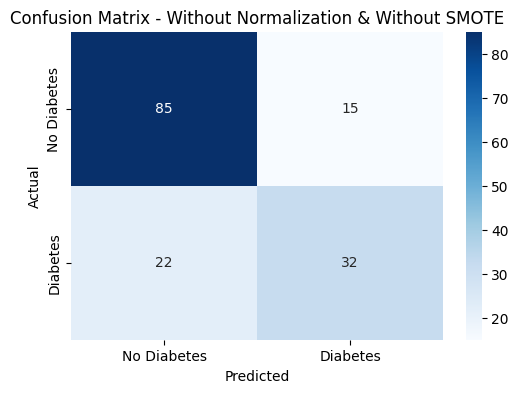

In [ ]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]
df = pd.read_csv(url, names=columns)
X = df.drop("Outcome", axis=1)
y = df["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)
    plt.show()

# 1. Without Normalization & Without SMOTE
clf1 = RandomForestClassifier(n_estimators=100, max_depth=100, random_state=42)
clf1.fit(X_train, y_train)
y_pred1 = clf1.predict(X_test)
print("Accuracy - Without Normalization & Without SMOTE:", accuracy_score(y_test, y_pred1))
print("Classification Report:\n", classification_report(y_test, y_pred1))
plot_confusion_matrix(y_test, y_pred1, "Confusion Matrix - Without Normalization & Without SMOTE")


## Case 2

### nomalization and without SMOTE

Accuracy - With Normalization & Without SMOTE: 0.7467532467532467
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.83      0.81       100
           1       0.65      0.59      0.62        54

    accuracy                           0.75       154
   macro avg       0.72      0.71      0.72       154
weighted avg       0.74      0.75      0.74       154



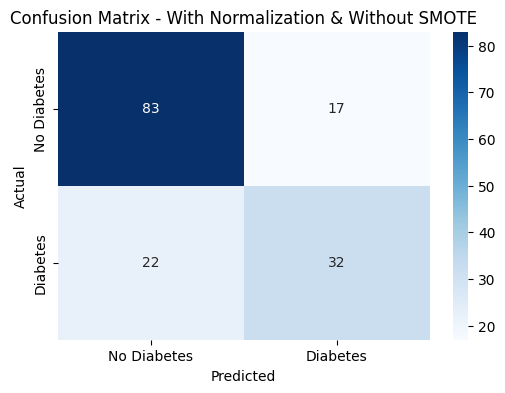

In [ ]:
# 2. With Normalization & Without SMOTE
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
clf2 = RandomForestClassifier(n_estimators=200, max_depth=50, random_state=42)
clf2.fit(X_train_scaled, y_train)
y_pred2 = clf2.predict(X_test_scaled)
print("Accuracy - With Normalization & Without SMOTE:", accuracy_score(y_test, y_pred2))
print("Classification Report:\n", classification_report(y_test, y_pred2))
plot_confusion_matrix(y_test, y_pred2, "Confusion Matrix - With Normalization & Without SMOTE")


## Case 3

### without data normalization with SMOTE

Accuracy - Without Normalization & With SMOTE: 0.7597402597402597
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.78      0.81       100
           1       0.64      0.72      0.68        54

    accuracy                           0.76       154
   macro avg       0.74      0.75      0.74       154
weighted avg       0.77      0.76      0.76       154



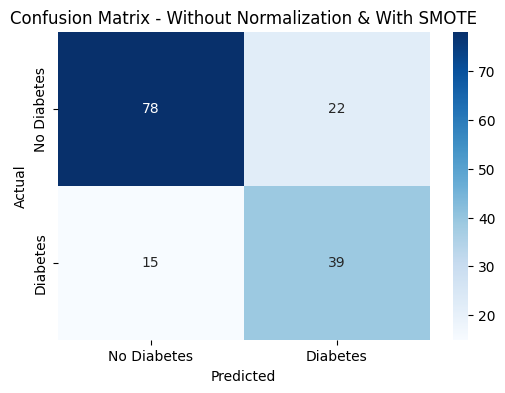

In [ ]:
# 3. Without Normalization & With SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
clf3 = RandomForestClassifier(n_estimators=200, max_depth=100, random_state=42)
clf3.fit(X_train_resampled, y_train_resampled)
y_pred3 = clf3.predict(X_test)
print("Accuracy - Without Normalization & With SMOTE:", accuracy_score(y_test, y_pred3))
print("Classification Report:\n", classification_report(y_test, y_pred3))
plot_confusion_matrix(y_test, y_pred3, "Confusion Matrix - Without Normalization & With SMOTE")


## Case 4

### With data normalization with SMOTE

In [ ]:
# 4. With Normalization & With SMOTE
X_train_resampled_scaled, y_train_resampled_scaled = smote.fit_resample(X_train_scaled, y_train)
clf4 = RandomForestClassifier(n_estimators=200, max_depth=5, random_state=42)
clf4.fit(X_train_resampled_scaled, y_train_resampled_scaled)
y_pred4 = clf4.predict(X_test_scaled)
print("Accuracy - With Normalization & With SMOTE:", accuracy_score(y_test, y_pred4))
print("Classification Report:\n", classification_report(y_test, y_pred4))
plot_confusion_matrix(y_test, y_pred4, "Confusion Matrix - With Normalization & With SMOTE")


Accuracy - With Normalization & With SMOTE: 0.7662337662337663
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.74      0.80       100
           1       0.63      0.81      0.71        54

    accuracy                           0.77       154
   macro avg       0.75      0.78      0.76       154
weighted avg       0.79      0.77      0.77       154



## XG Boost

## Case 1

### without nomalization and SMOTE

In [ ]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]
df = pd.read_csv(url, names=columns)
# แบ่ง train-test set
X = df.drop("Outcome", axis=1)
y = df["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)
    plt.show()

# 1. Without Normalization & Without SMOTE
clf1 = XGBClassifier(n_estimators=200, max_depth=10, use_label_encoder=False, eval_metric='logloss', random_state=50)
clf1.fit(X_train, y_train)
y_pred1 = clf1.predict(X_test)
print("Accuracy - Without Normalization & Without SMOTE:", accuracy_score(y_test, y_pred1))
print("Classification Report:\n", classification_report(y_test, y_pred1))
plot_confusion_matrix(y_test, y_pred1, "Confusion Matrix - Without Normalization & Without SMOTE")

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:54:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy - Without Normalization & Without SMOTE: 0.7272727272727273
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.81      0.79       100
           1       0.62      0.57      0.60        54

    accuracy                           0.73       154
   macro avg       0.70      0.69      0.70       154
weighted avg       0.72      0.73      0.72       154



## Case 2

### nomalization and without SMOTE

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:54:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy - With Normalization & Without SMOTE: 0.7532467532467533
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.80      0.81       100
           1       0.64      0.67      0.65        54

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.76      0.75      0.75       154



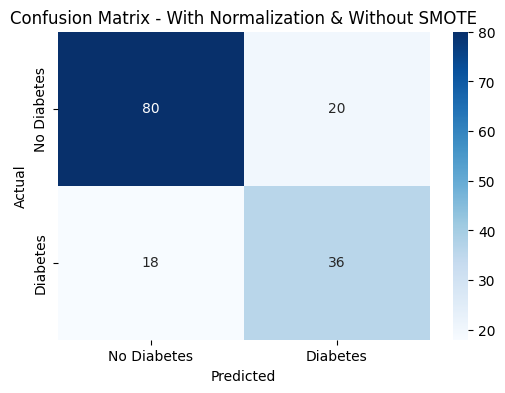

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
clf2 = XGBClassifier(n_estimators=100, max_depth=50, use_label_encoder=False, eval_metric='logloss', random_state=42)
clf2.fit(X_train_scaled, y_train)
y_pred2 = clf2.predict(X_test_scaled)
print("Accuracy - With Normalization & Without SMOTE:", accuracy_score(y_test, y_pred2))
print("Classification Report:\n", classification_report(y_test, y_pred2))
plot_confusion_matrix(y_test, y_pred2, "Confusion Matrix - With Normalization & Without SMOTE")


## Case 3

### without data normalization with SMOTE

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:54:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy - Without Normalization & With SMOTE: 0.7662337662337663
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.80      0.82       100
           1       0.66      0.70      0.68        54

    accuracy                           0.77       154
   macro avg       0.74      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



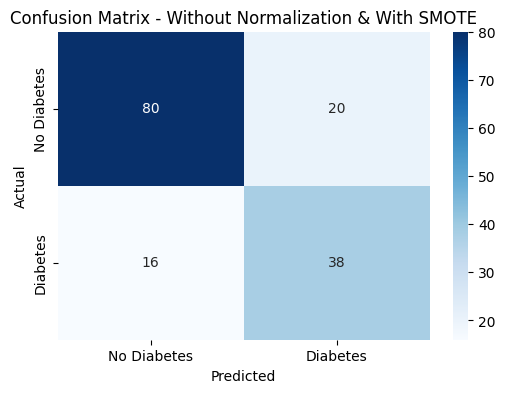

In [ ]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
clf3 = XGBClassifier(n_estimators=200, max_depth=10, use_label_encoder=False, eval_metric='logloss', random_state=42)
clf3.fit(X_train_resampled, y_train_resampled)
y_pred3 = clf3.predict(X_test)
print("Accuracy - Without Normalization & With SMOTE:", accuracy_score(y_test, y_pred3))
print("Classification Report:\n", classification_report(y_test, y_pred3))
plot_confusion_matrix(y_test, y_pred3, "Confusion Matrix - Without Normalization & With SMOTE")

## Case 4

### With data normalization with SMOTE

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:54:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy - With Normalization & With SMOTE: 0.7662337662337663
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.79      0.81       100
           1       0.65      0.72      0.68        54

    accuracy                           0.77       154
   macro avg       0.75      0.76      0.75       154
weighted avg       0.77      0.77      0.77       154



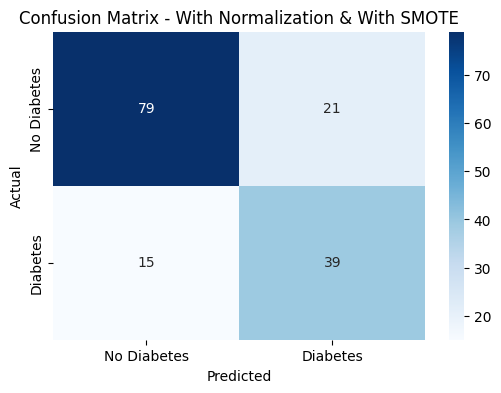

In [ ]:
# 4. With Normalization & With SMOTE
X_train_resampled_scaled, y_train_resampled_scaled = smote.fit_resample(X_train_scaled, y_train)
clf4 = XGBClassifier(n_estimators=200, max_depth=50, use_label_encoder=False, eval_metric='logloss', random_state=42)
clf4.fit(X_train_resampled_scaled, y_train_resampled_scaled)
y_pred4 = clf4.predict(X_test_scaled)
print("Accuracy - With Normalization & With SMOTE:", accuracy_score(y_test, y_pred4))
print("Classification Report:\n", classification_report(y_test, y_pred4))
plot_confusion_matrix(y_test, y_pred4, "Confusion Matrix - With Normalization & With SMOTE")


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
X = df.drop("Outcome", axis=1)
y = df["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)
    plt.show()

# สร้าง Interaction Features
for i in range(X_train.shape[1]):
    for j in range(i + 1, X_train.shape[1]):
        X_train[f"{X_train.columns[i]}*{X_train.columns[j]}"] = X_train.iloc[:, i] * X_train.iloc[:, j]
        X_test[f"{X_test.columns[i]}*{X_test.columns[j]}"] = X_test.iloc[:, i] * X_test.iloc[:, j]

# สร้าง Polynomial Features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train โมเดล (Random Forest)
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train_poly, y_train)

# ทำนายผลลัพธ์
y_pred_rf = rf_clf.predict(X_test_poly)

# แสดงผลลัพธ์
print("Accuracy - RandomForestClassifier (Interaction + Polynomial Features):", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
plot_confusion_matrix(y_test, y_pred_rf, "Confusion Matrix - RandomForestClassifier (Interaction + Polynomial Features)")

Streaming output truncated to the last 5000 lines.
<ipython-input-16-359a47f8f4d2>:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_train[f"{X_train.columns[i]}*{X_train.columns[j]}"] = X_train.iloc[:, i] * X_train.iloc[:, j]
<ipython-input-16-359a47f8f4d2>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test[f"{X_test.columns[i]}*{X_test.columns[j]}"] = X_test.iloc[:, i] * X_test.iloc[:, j]
<ipython-input-16-359a47f8f4d2>:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `fram

Accuracy - RandomForestClassifier (Interaction + Polynomial Features): 0.6883116883116883
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.75      0.76       100
           1       0.55      0.57      0.56        54

    accuracy                           0.69       154
   macro avg       0.66      0.66      0.66       154
weighted avg       0.69      0.69      0.69       154

